MNIST作为一个检验训练模型的基础数据集，是一个典型的多分类问题。训练模型需要判断图像数据为0-9数据中的哪一个。并给出一个概率分布。

[1,  300]loss:2.143
[1,  600]loss:0.749
[1,  900]loss:0.413
Accuracy on test set: 90.550000 %
[2,  300]loss:0.304
[2,  600]loss:0.270
[2,  900]loss:0.216
Accuracy on test set: 94.290000 %
[3,  300]loss:0.182
[3,  600]loss:0.165
[3,  900]loss:0.157
Accuracy on test set: 95.760000 %
[4,  300]loss:0.130
[4,  600]loss:0.123
[4,  900]loss:0.116
Accuracy on test set: 96.190000 %
[5,  300]loss:0.100
[5,  600]loss:0.092
[5,  900]loss:0.091
Accuracy on test set: 97.020000 %
[6,  300]loss:0.071
[6,  600]loss:0.080
[6,  900]loss:0.075
Accuracy on test set: 97.200000 %
[7,  300]loss:0.057
[7,  600]loss:0.061
[7,  900]loss:0.065
Accuracy on test set: 97.280000 %
[8,  300]loss:0.048
[8,  600]loss:0.052
[8,  900]loss:0.050
Accuracy on test set: 97.550000 %
[9,  300]loss:0.039
[9,  600]loss:0.039
[9,  900]loss:0.042
Accuracy on test set: 97.660000 %
[10,  300]loss:0.030
[10,  600]loss:0.034
[10,  900]loss:0.033
Accuracy on test set: 97.620000 %


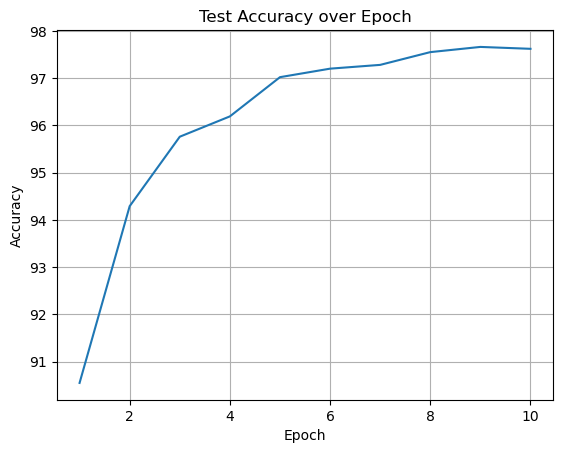

In [11]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

#Prepare Dataset
batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

train_dataset = datasets.MNIST(root='./dataset/mnist/',
                               train=True,
                               download=True,
                               transform=transform
                               )
train_loader = DataLoader(train_dataset,
                          shuffle = True,
                          batch_size = batch_size
                          )
test_dataset = datasets.MNIST(root= './dataset/mnist/',
                              train = False,
                              transform= transform
                              )
test_loader = DataLoader(test_dataset,
                         shuffle = False,
                         batch_size = batch_size
                         )

#Dessign a model

class NET (torch.nn.Module):
    def __init__(self):
        super(NET,self).__init__()
        self.l1 = torch.nn.Linear(784,512)
        self.l2 = torch.nn.Linear(512,256)
        self.l3 = torch.nn.Linear(256,128)
        self.l4 = torch.nn.Linear(128,64)
        self.l5 = torch.nn.Linear(64,10)

    def forward(self,x):
        x = x.view(-1,784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)
model = NET()

#Construct Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01, momentum = 0.5)

#train and test

def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader,0):
        inputs,target = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx%300 == 299:
            print('[%d,%5d]loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = model(images)
            _,predicted = torch.max(outputs.data,dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100*correct/total
    print('Accuracy on test set: %f %%' % (accuracy))
    return accuracy


#excute
accuracy_value = []
num_epochs = 10
for epoch in range(num_epochs):
    train (epoch)
    accuracy = test()
    accuracy_value.append(accuracy)

plt.plot(range(1,num_epochs+1),accuracy_value)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epoch')
plt.grid(True)
plt.show()